In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [5]:
data = pd.read_csv('dados_estudantes.csv')
data.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


<Axes: xlabel='Migração', ylabel='count'>

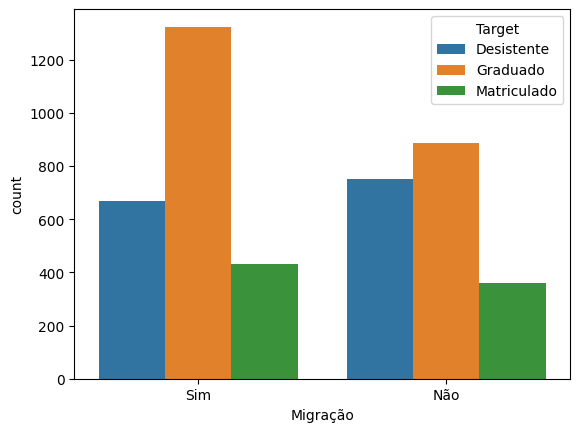

In [9]:
sns.countplot(x = 'Migração', hue='Target', data=data)

In [13]:
data['Necessidades educacionais especiais'].value_counts(normalize=True)

Necessidades educacionais especiais
Não    0.988472
Sim    0.011528
Name: proportion, dtype: float64

In [21]:
data.groupby("Target")['Necessidades educacionais especiais'].value_counts(normalize=True)

Target       Necessidades educacionais especiais
Desistente   Não                                    0.988037
             Sim                                    0.011963
Graduado     Não                                    0.989588
             Sim                                    0.010412
Matriculado  Não                                    0.986146
             Sim                                    0.013854
Name: proportion, dtype: float64

<Axes: xlabel='Target', ylabel='Taxa de desemprego'>

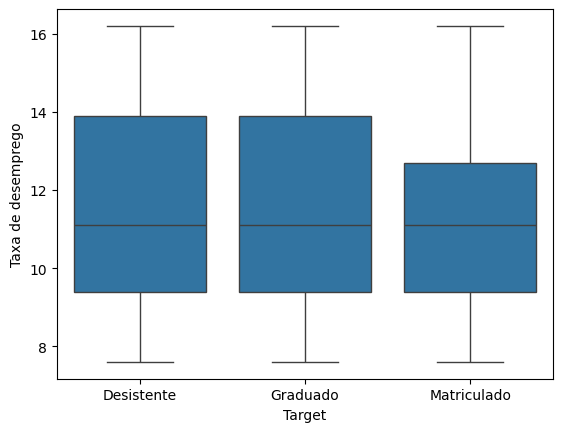

In [23]:
sns.boxplot(x='Target', y='Taxa de desemprego', data=data)

<Axes: xlabel='Target', ylabel='Taxa de inflação'>

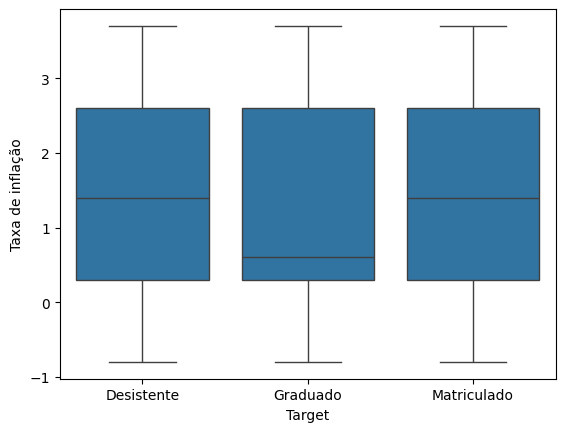

In [26]:
sns.boxplot(x='Target', y='Taxa de inflação', data=data)



In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']


In [33]:
encoder = OneHotEncoder(drop='if_binary')
df_categorico = data[colunas_categoricas]
data_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(), columns=encoder.get_feature_names_out(df_categorico.columns))
df_final = pd.concat([data.drop(columns=colunas_categoricas), data_encoded], axis=1)
df_final




,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X = df_final.drop(columns='Target', axis=1)
y = df_final['Target']

In [40]:
from sklearn.model_selection import train_test_split

In [43]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)


In [44]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
modelo_rf = 